In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

df=pd.read_csv(r"C:\Users\kavin\OneDrive\Desktop\New folder (3)\regression_datasets_large.xlsx - Movie_Revenue.csv")
df

,Movie_ID,Marketing_Spend_Cr,Star_Power,Genre,Budget_Cr,Screens,Social_Media_Buzz,IMDB_Rating,Competition,Box_Office_Revenue_Cr
0,1,33.106857,7,Drama,14.890417,2248,29731,5.006819,High,108.275482
1,2,27.992011,4,Comedy,73.812188,1131,44922,5.293104,High,81.992953
2,3,5.262351,8,Comedy,59.946757,944,45848,4.823532,Low,11.274974
3,4,21.014207,7,Horror,31.045263,186,4390,5.651075,Low,83.316156
4,5,19.261737,5,Drama,12.544840,2190,6997,7.783758,Low,160.426849
...,...,...,...,...,...,...,...,...,...,...
195,196,3.957252,1,Comedy,11.331944,2683,49777,7.009617,High,117.024897
196,197,13.108058,1,Comedy,54.248762,261,17994,8.462616,High,32.791202
197,198,8.817689,1,Horror,19.266055,693,2727,6.216900,Low,184.190421
198,199,43.717395,3,Horror,75.056208,2038,35622,7.035448,Low,146.924478


In [18]:
X = df[["Marketing_Spend_Cr"]]
y = df["Box_Office_Revenue_Cr"]

In [19]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [20]:
print("Intercept (b0):", model.intercept_)
print("Slope (b1):", model.coef_[0])

Intercept (b0): 93.60596763688613
Slope (b1): 0.4039092163586252


In [33]:
predicted_revenue = model.predict([[10]])
print(predicted_revenue)

[97.6450598]


c:\Users\kavin\anaconda4\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
y_pred = model.predict(X)

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
print(mae)
print(mse)

47.023423889970324
3007.28571895145


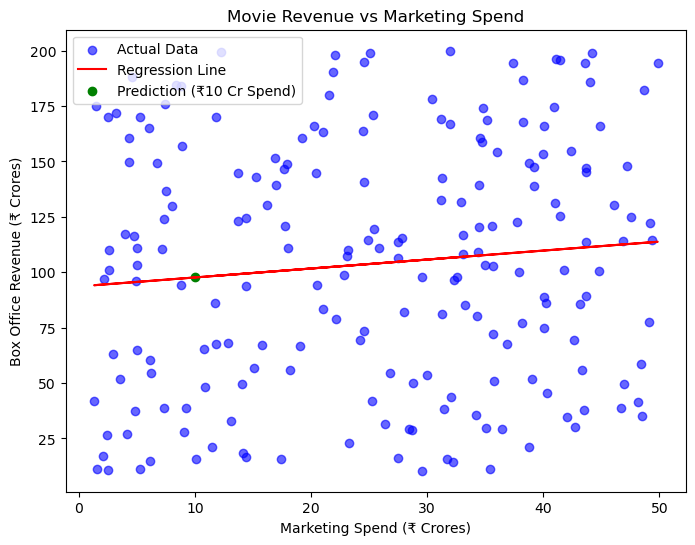

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, color="blue", alpha=0.6, label="Actual Data")
plt.plot(X, model.predict(X), color="red", label="Regression Line")
plt.scatter([10], [predicted_revenue], color="green", label="Prediction (₹10 Cr Spend)")
plt.xlabel("Marketing Spend (₹ Crores)")
plt.ylabel("Box Office Revenue (₹ Crores)")
plt.title("Movie Revenue vs Marketing Spend")
plt.legend()
plt.show()

Conlusion:
Marketing spend has a positive correlation with box office revenue.
However, it is NOT the only factor influencing success.
Star Power, Genre, Release Screens, Social Media Buzz, Ratings, and Competition also play major roles.
Therefore, marketing spend alone cannot fully explain success.
Predicted Revenue for ₹10 crore marketing spend is $97.64